# UV-Vis Spectrophotometry

## Learning Objectives
*At the conclusion of in-class and outside learning, participants will be able to:*
- Describe limitations to Beer's law. 
- Qualitatively predict whether a limitation to Beer's law will cause a positive or negative bias to an analysis.
- Using principles from general chemistry, estimate the effect of speciation on the apparent absorbance of an analyte.
- Compare types and sources of noise in transmittance measurements.
- Describe the steps required to develop a procedure for an absorbance measurement.
- Using classical least-squares analysis, quantify individual analytes in a mixture.
- Using results from a spectrophotometric titration, determine the end point of the titration and the concentration of the analyte.

## Post-Class Materials
### Suggested Reaching
- Review the standard addition method, a learning objective from CHEM 321 Quantitative Analysis
- [Transmittance and Absorbance](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Instrumental_Analysis_(LibreTexts)/13%3A_Introduction_to_Ultraviolet_Visible_Absorption_Spectrometry/13.01%3A_Transmittance_and_Absorbance)
- [Beer's Law](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Instrumental_Analysis_(LibreTexts)/13%3A_Introduction_to_Ultraviolet_Visible_Absorption_Spectrometry/13.02%3A_Beer's_Law)
- [Effects of Instrumental Noise on Spectrophotometric Analyses](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Instrumental_Analysis_(LibreTexts)/13%3A_Introduction_to_Ultraviolet_Visible_Absorption_Spectrometry/13.03%3A_Effect_of_Noise_on_Transmittance_and_Absorbance_Measurements)
- [Quantitative Analysis by Absorption Measurements](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Instrumental_Analysis_(LibreTexts)/14%3A_Applications_of_Ultraviolet_Visible_Molecular_Absorption_Spectrometry/14.04%3A_Quantitative_Applications)
- [Photometric Titrations](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Instrumental_Analysis_(LibreTexts)/14%3A_Applications_of_Ultraviolet_Visible_Molecular_Absorption_Spectrometry/14.05%3A_Photometric_Titrations)
### Suggested Problems
- Need to update. 
- Previous year: Skoog 13-1, 13-8, 13-9, 14-4, 14-8, 14-10

## Recall

The simplest way to characterize the response function for a protocol is to perform the protocol on **external standards**, which are solutions that were prepared with a known amount of the analyte. The standards are then analyzed and the results are plotted in order to determine the response function.

$$Absorbance = \varepsilon \cdot l \cdot [analyte]$$

$$Signal = K \cdot [analyte]$$

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('plot.mplstyle')

# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,5))

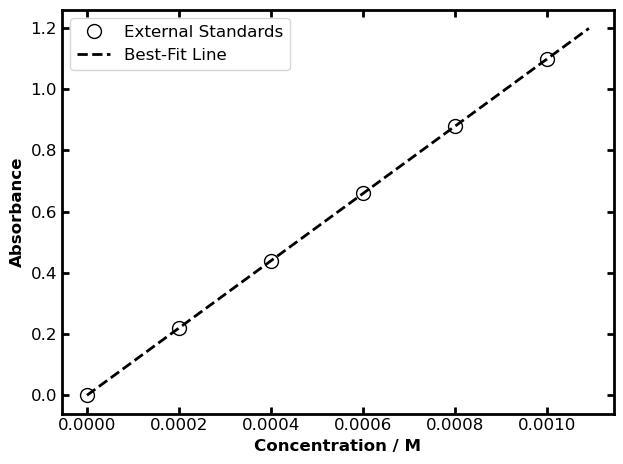

In [12]:
# Plotting the results for the external standards.
concentration = np.arange(0.0,0.0011,0.0002)
absorbance = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='External Standards')

coefficients = np.polynomial.polynomial.polyfit(concentration,absorbance,1)
intercept, slope = coefficients
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[0],marker='',ls='--',label='Best-Fit Line')

ax.set_xlabel('Concentration / M', fontweight='bold')
ax.set_ylabel('Absorbance', fontweight='bold')
ax.legend(loc='upper left')
plt.show()

**Figure 1.** An example of calibration with external standards. Here, the response is extremely linear, consistent with Beer's law holding true under the conditions of the experiment.

## Deviations from Beer's Law

### Deviations from the Underlying Assumptions of Beer's Law
- With increasing concentrations, solute-solute interactions may affect the apparent $\epsilon$.

### Speciation
- $\epsilon$ can depend on the speciation of the analyte. 
- *Reflect:* Based on what you have learned in general chemical and quantitative analysis, give an example of how speciation of an analyte may affect its $\epsilon$.

### Polychromatic Radiation
- Beer's law is for monochromatic light. 
- *Reflect:* Based on what you learned last time, to what extent is this true for different illumination schemes?

![Effect of Polychromatic Radiation](./images-uv-vis/06_ch13_Fig04.jpg)

**Figure 2.** The effect of Deviations from Beer's law with polychromatic radiation. From Skoog Figure 13-4.

### Stray Light
- *Reflect:* Based on the relationship between absorbance and transmission, will stray light have a great impact on relative transparent samples or relatively opaque samples? 

## Photometric Titrations

![Photometric Titrations](./images-uv-vis/16_ch14_Fig12.jpg)

**Figure 3.** Typical photometric titration curves. Molar absortivites of the analyte, the product, and the titration are given by $\epsilon_A$, $\epsilon_P$, and $\epsilon_T$, respectively. The dashed lines represent actual data and the solid lines are extrapolated from the linear portions of the plots. From Skoog Figure 14-12. 

## Classical Least-Squares (CLS) Analysis

### Objective

Quantify individual analytes in a mixture without separation techniques, and when only partial spectral selectivity is available at all wavelengths, $\lambda$. 

### Recall: Two Component Analysis

A learning objective for CHEM 321 Quantitative Analysis is to determine the concentration of two analytes in a mixture based on results at two wavelengths.

![Absorption of a two-component mixture.](./images-uv-vis/13_ch14_Fig09.jpg)

**Figure 4.** Absorption specrum of a two component mixture (M+N) with spectra of the individual components. Vertical dashed lines indicdate optimal wavelengths for determination of the two components. From Skoog Figure 14-9.

### Premise

The absorbance measurements of the unknown mixture are treated as a system of linear equations following Beer's Law, where the total absorbance at each wavelength is the sum of the contributions from each component based on their concentrations and molar absorptivities. Absorbance of each analyte is additive, and ideally, an independent of other analytes. 

CLS analysis for absorbance spectroscopy involves solving an equation of the form (BOLD = vector for $n \cdot \lambda$):

$$ A(\lambda)_{mixture} = C_1 \cdot l \cdot \epsilon_1(\lambda) + C_2 \cdot l \cdot \epsilon_2(\lambda) + \cdots + C_n \cdot l \cdot \epsilon_n(\lambda) $$
$$ A(\lambda)_{mixture} = \sum_{i=1}^{n} {C_i \cdot l \cdot \epsilon_i(\lambda)} $$

where $A(\lambda)_{mixture}$ is the spectrum for the mixture, $\epsilon_i(\lambda)$ is the molar absorbtivity at each wavelength for analyte $i$, and $C_i$ is the concentration of analyte $i$ in the mixture.

### Sample Data

![Sample data for multi-component analysis.](./images-uv-vis/multi-component-absorbance.png)

**Figure 5.** These spectra are for a mixture containing four analytes and for four standards, each analyzed independently. Figure from Rob Synovec.

### Linear Algebra

The system is typically overdetermined by measuring absorbance at more wavelengths than there are components in the mixture, allowing the use of matrix algebra to solve for the unknown concentrations through the method of least squares: $C = (B^TB)^{-1}B^TA$, where C is the concentration vector, $B$ is the calibration matrix of molar absorptivities, $B^T$ is the transpose of $B$ and A is the vector of measured absorbances.

![Matrices for analysis of sample data.](./images-uv-vis/matrices.png)

**Figure 6.** Example matrices for analysis of the sample data. Figure from Rob Synovec.

The quality of the analysis can be evaluated by examining the residuals between the measured absorbance values and those predicted by the calculated concentrations, with smaller residuals indicating a better fit and more reliable concentration determinations.

#### Reflection Questions
- What is the minimum number of $\lambda$ values each each matrix?
- What are the benefits of using matrixes with additional $\lambda$ values?


